<font size=4.5 color='orange'>Coding for different types of Denosing Techniques

In [1]:
import cv2 as cv
import numpy as np
from PIL import Image

<font size=3 color='darkblue'>Generating 'Salt and Pepper noise'

In [2]:
def sp_noise(image):
    "Returns the noisy image of the input"
    output = image.copy()
    
    if len(image.shape)==2: #gray scale
        black = 0
        white = 255
    else: #RGB
        black = np.array([0, 0, 0], dtype='uint8')
        white = np.array([255, 2555, 255], dtype='uint8')
    
    #threshold for generating noise
    random_threshold = np.random.random(image.shape[:2])
    output[random_threshold<random_threshold/2] = black
    output[random_threshold>1-random_threshold/2] = white
    
    return output

In [3]:
image = cv.imread("images/resized_car.jpg")
noisy_img = sp_noise(image)
cv.imshow("Salt and Pepper noise", np.hstack((image,noisy_img)))
cv.waitKey(0)
cv.imwrite("images/sp_noisy_img.jpg",noisy_img)

True

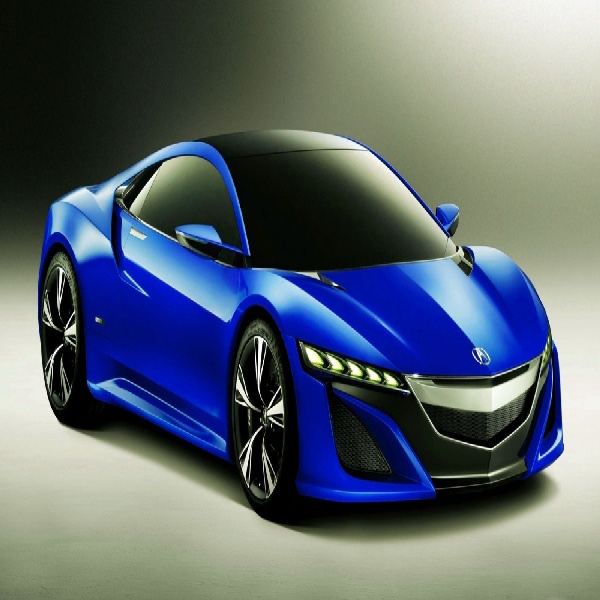

In [4]:
Image.open("images/resized_car.jpg")

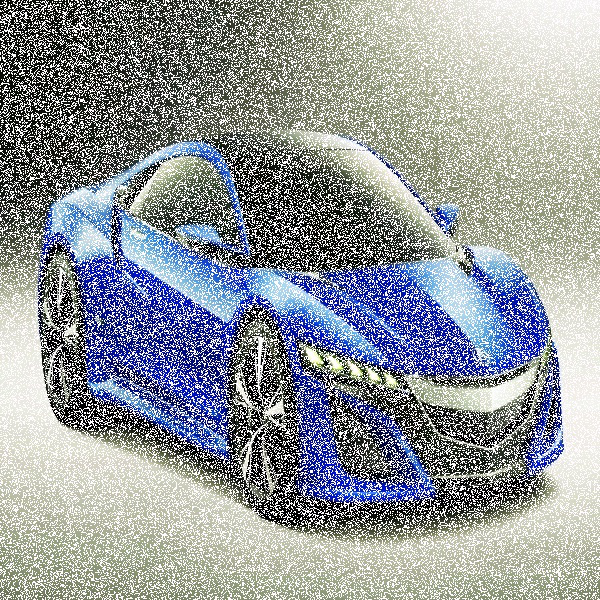

In [5]:
Image.open("images/sp_noisy_img.jpg")

<font size=3 color='darkblue'>1. Mean Filtering

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

In [6]:
def mean_filter(image, filter_size):
    "applies mean filter on the image"
    filter_shape = (filter_size, filter_size)
    conv_filter = np.ones(filter_shape)/(filter_size*filter_size)
    filtered_image = cv.filter2D(image,-1,conv_filter)
    return filtered_image

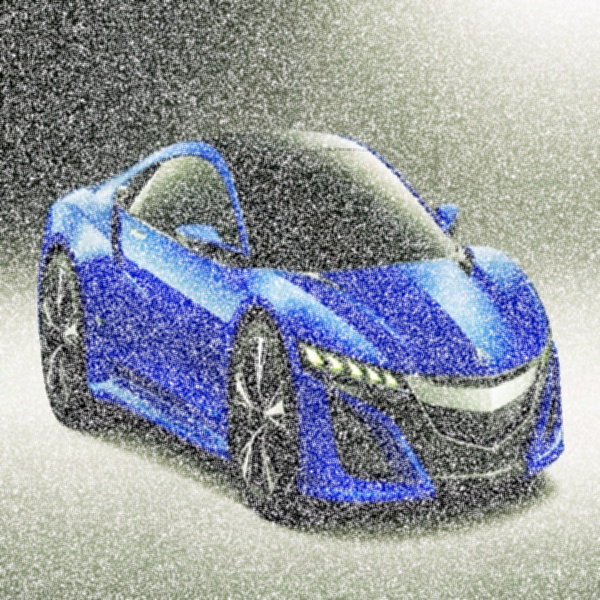

In [7]:
mean_filtered_image = mean_filter(noisy_img,3)
cv.imshow("Mean Filtered", mean_filtered_image)
cv.waitKey(0)
cv.imwrite("images/mean_filter_img.jpg", mean_filtered_image)
Image.open("images/mean_filter_img.jpg")

<font size=3 color='darkblue'>2. Median Filtering

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9

In [8]:
def median_filter(image, filter_size):
    "Applies median filter on the image"
    return cv.medianBlur(image, filter_size)

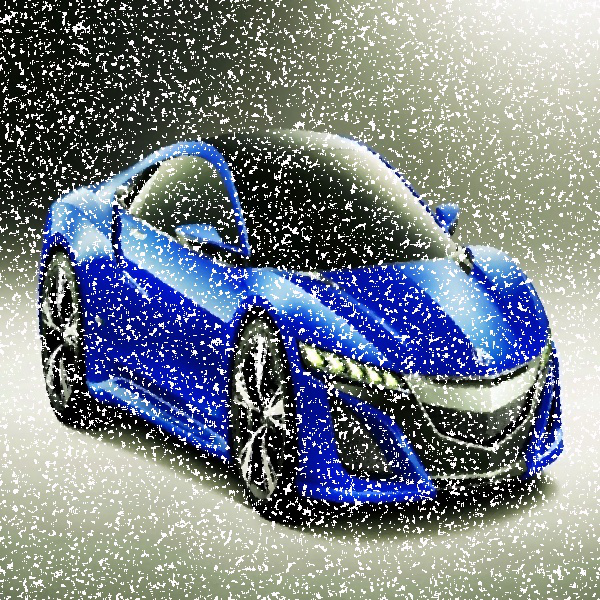

In [9]:
median_filtered_image = median_filter(noisy_img,3)
cv.imshow("Mean Filtered", median_filtered_image)
cv.waitKey(0)
cv.imwrite("images/median_filter_img.jpg", median_filtered_image)
Image.open("images/median_filter_img.jpg")

<font size=3 color='darkblue'>3. Gaussian Filtering

https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1<br>
This function blurs the given image

In [10]:
def gaussian_filter(image, filter_size, sigma):
    "Applies Gaussian Filter on the image"
    return cv.GaussianBlur(image, (filter_size, filter_size), sigma)

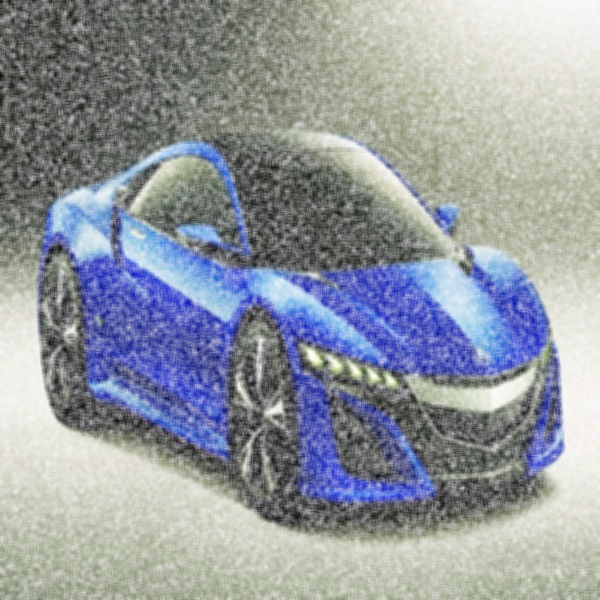

In [11]:
gaussian_filtered_image = gaussian_filter(noisy_img, 5, 5)
cv.imshow("Gaussian Filter", gaussian_filtered_image)
cv.waitKey(0)
cv.imwrite("images/Gaussian_filtered_img.jpg", gaussian_filtered_image)
Image.open("images/Gaussian_filtered_img.jpg")

not useful for denoising

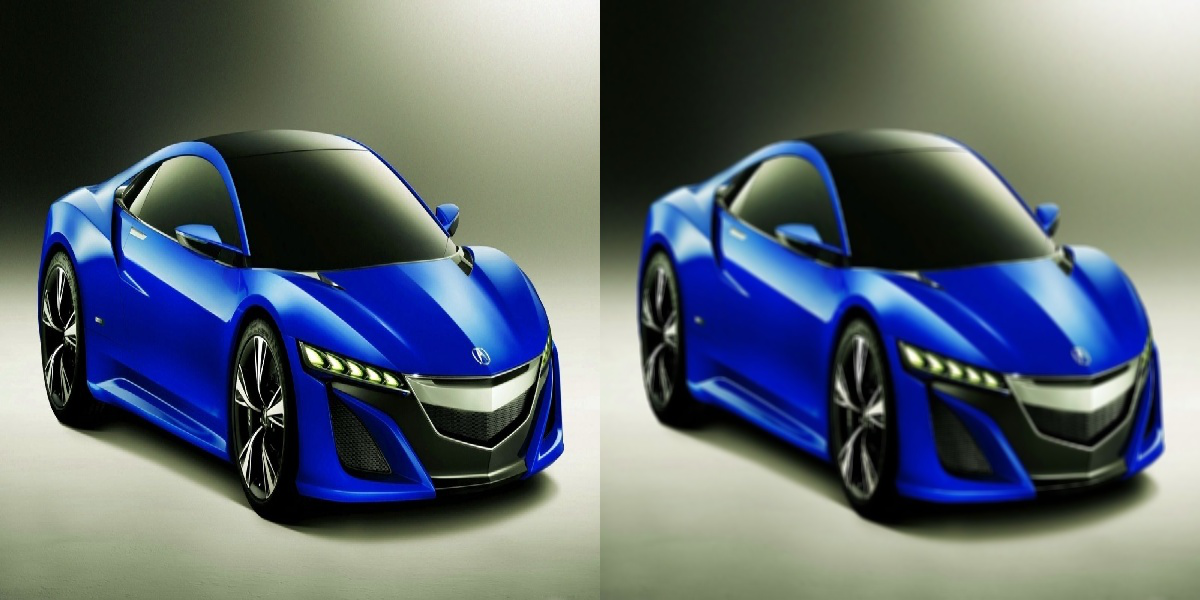

In [12]:
gaussian_filtered_image = gaussian_filter(image, 5, 5)
cv.imwrite("images/gaussian_blur.jpg", np.hstack((image, gaussian_filtered_image)))
Image.open("images/gaussian_blur.jpg")